In [1]:
import random as rnd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections, functools, operator

In [2]:
def q_voter_model(G, p, q, f, epsilon, N = 1000, ratio = 0.5):
    """
    Function simulates the q-voter model over 1000 monte-carlo runs with the NN infuence model group, where in the network
    there are 1000 spinsons
    
    Key arguments:
    G -- networkx Graph
    p -- independence factor -- float
    q -- number of closest neighbors that can affect the opinion of a particular spinson -- integer
    f -- probability of turning the opinion while being independent
    epsilon -- probability of voter's opinion flipping while being a conformist unaffected by neighbors 
    N -- number of monte-carlo runs during the simulation
    ratio -- percent of the opinions at time = 0 that are equal to 1 
    
    Function returns network's concentration after the whole simulaton.
    """
    dicts = []
    all_nodes = list(G.nodes())
    opinion_dict = {}
    for i in range(len(all_nodes)):
        rand1 = rnd.random()
        if rand1 < ratio :
            opinion_dict[i] = 1
        else:
            opinion_dict[i] = 0 
    dicts.append(opinion_dict)
    for k in range(N):
        independent = []
        conformist = []
        all_nodes = list(G.nodes())
        for node in all_nodes:
            rand = rnd.random()
            if rand < p:
                independent.append(node)
            else:
                conformist.append(node)
        for s in independent:
            state = opinion_dict[s]
            rand2 = rnd.random()
            if rand2 < f:
                if state == 1:
                    opinion_dict[s] = 0
                else:
                    opinion_dict[s] = 1
        for d in conformist:
            friends = list(G.neighbors(d))
            chosen_friends = rnd.sample(friends, q)
            opinions = []
            for y in chosen_friends:
                opinions.append(opinion_dict[y])
            if sum(opinions) == q:
                opinion_dict[d] = 1
            elif sum(opinions) == 0:
                opinion_dict[d] = 0
            else:
                random3 = rnd.random()
                state = opinion_dict[d]
                if random3 < epsilon:
                    if state == 1:
                        opinion_dict[d] = 0
                    else:
                        opinion_dict[d] = 1
        dicts.append(opinion_dict)
    c = sum(list(opinion_dict.values()))/len(G.nodes())
    return c

def concentration(G, list_of_p, q, f, epsilon, N, k, ratio = 0.5):
    """
    Function calculates the average concentration for the list of values of p of a chosen number runs of the q voter model.
    
    Key arguments:
    G -- networkx Graph
    list_of_p -- list of independence factors -- list of floats
    q -- number of closest neighbors that can affect the opinion of a particular spinson -- integer
    f -- probability of turning the opinion while being independent
    epsilon -- probability of voter's opinion flipping while being a conformist unaffected by neighbors 
    N -- number of monte-carlo runs during the simulation
    k -- number of runs for calculating the avg magnetization -- integer
    ratio -- percent of the opinions at time = 0 that are equal to 1 
    
    Function returns the list of average magentizations for each timestep of the simulation
    """

    avg_vs_p = []
    for i in list_of_p:
        avg = []
        for r in range(k):
            voter = q_voter_model(G, i, q, f, epsilon, N, ratio)
            avg.append(voter)
        avg_vs_p.append(np.mean(avg))
    
    return avg_vs_p

In [6]:
list_of_p = list(range(0,101,2))
for i in range(len(list_of_p)):
    list_of_p[i] /=100
G = nx.complete_graph(100)
modelf_02 = concentration(G, list_of_p, 4, 0.2, 0.05, 100, 50, ratio = 1)
modelf_03 = concentration(G, list_of_p, 4, 0.3, 0.05, 100, 50, ratio = 1)
modelf_04 = concentration(G, list_of_p, 4, 0.4, 0.05, 100, 50, ratio = 1)
modelf_05 = concentration(G, list_of_p, 4, 0.5, 0.05, 100, 50, ratio = 1)

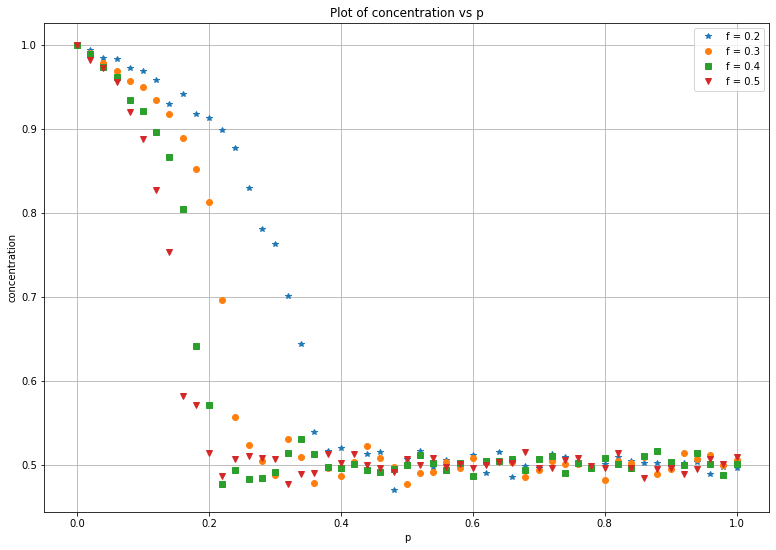

In [7]:
plt.figure(figsize = (13,9))
plt.plot(list_of_p, modelf_02, '*', label = "f = 0.2")
plt.plot(list_of_p, modelf_03, 'o', label = "f = 0.3")
plt.plot(list_of_p, modelf_04, 's', label = "f = 0.4")
plt.plot(list_of_p, modelf_05, 'v', label = "f = 0.5")
plt.legend(loc = "best")
plt.grid()
plt.xlabel("p")
plt.ylabel("concentration")
plt.title("Plot of concentration vs p")
plt.savefig("Concentration vs p.png",dpi = 500)
plt.show()